In [1]:
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('imdb-reviews.csv', sep = '\t')
print(dataset)
dataset.describe()
row_count_train = sum(1 for rows in dataset["url"])


                                                    url  rating  \
0      http://www.imdb.com/title/tt0120623/usercomments    10.0   
1      http://www.imdb.com/title/tt0043117/usercomments     9.0   
2      http://www.imdb.com/title/tt0043117/usercomments    10.0   
3      http://www.imdb.com/title/tt0835204/usercomments     4.0   
4      http://www.imdb.com/title/tt0499603/usercomments    10.0   
...                                                 ...     ...   
45003  http://www.imdb.com/title/tt0449000/usercomments     1.0   
45004  http://www.imdb.com/title/tt0109382/usercomments     1.0   
45005  http://www.imdb.com/title/tt0375560/usercomments     1.0   
45006  http://www.imdb.com/title/tt0165107/usercomments     1.0   
45007  http://www.imdb.com/title/tt0041513/usercomments    10.0   

                                                  review  
0      I thought this was a quiet good movie. It was ...  
1      Wagon Master is a very unique film amongst Joh...  
2      This film h

In [2]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2023-01-27 10:24:32--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-01-27 10:24:32--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-01-27 10:24:33--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [3]:
import random
import os
import numpy as np
import torch
import torch.nn as nn


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device available for running: ")
print(device)
def set_seed(seed = 1234):
    '''Sets the seed of the entire notebook so results are the same every time we run. This is for REPRODUCIBILITY.
    '''
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    # When running on the CuDNN backend, two further options must be set
    torch.backends.cudnn.deterministic = True
    # Set a fixed value for the hash seed
    os.environ['PYTHONHASHSEED'] = str(seed)
    
set_seed()

Device available for running: 
cpu


In [10]:
rnn = nn.LSTM(300, 8, 20, batch_first = True, bidirectional = True, dropout = 0.05)
input = torch.randn(64, 1, 300)
h0 = torch.randn(40, 64, 8)
c0 = torch.randn(40, 64, 8)
output, (hn, cn) = rnn(input, (h0, c0))
print(input,output, hn, cn)

tensor([[[ 0.1525, -1.9229,  0.9209,  ...,  0.1305,  0.6592, -0.3300]],

        [[ 0.8687,  0.1566,  0.4452,  ...,  0.4271,  0.5866,  1.0632]],

        [[-2.0328,  0.8706, -0.0158,  ..., -1.4449,  0.6660,  1.4214]],

        ...,

        [[-0.0292, -1.0252, -1.0758,  ..., -1.7986, -0.9881,  0.4435]],

        [[ 0.8542,  0.2714,  1.6822,  ...,  0.5634, -0.2216,  0.3966]],

        [[ 0.0322, -0.6912, -2.9795,  ..., -1.7164, -1.0960, -1.7682]]]) tensor([[[ 0.0983,  0.1359, -0.0408,  ..., -0.3372, -0.0747, -0.3233]],

        [[-0.4252,  0.1950, -0.2136,  ...,  0.0650, -0.0162, -0.6787]],

        [[ 0.2204,  0.1095, -0.1955,  ..., -0.0651,  0.0806,  0.2617]],

        ...,

        [[ 0.2222, -0.2397,  0.1064,  ..., -0.3008, -0.1226, -0.0202]],

        [[-0.7228,  0.0445, -0.0844,  ..., -0.2270,  0.2193, -0.4329]],

        [[-0.0320, -0.1434, -0.1218,  ...,  0.2475,  0.0587, -0.2294]]],
       grad_fn=<TransposeBackward0>) tensor([[[-3.1868e-01, -4.6676e-02, -4.4072e-01,  ..., -6.6

In [4]:
import nltk
import string
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('stopwords')
from collections import Counter
 
def remove_duplicates(text):
 
    # split input string separated by space
    text = text.split(" ")
 
    # now create dictionary using counter method
    # which will have strings as key and their
    # frequencies as value
    UniqW = Counter(text)
 
    # joins two adjacent elements in iterable way
    text = " ".join(UniqW.keys())
    return text

def basic_preprocessing(text):
  # Remove tags
  text = re.sub(r'@\s?\w+',' ',str(text))
  # Remove underscore characters
  text = re.sub(r'_', ' ', text)
  # remove numbers
  text = re.sub(r'\d+', '', text)
  # Remove \r and \n
  text = re.sub(r'[\r\n]',' ', text)
  # remove whitespace from text
  text =  " ".join(text.split())
  # Remove single characters
  text = re.sub(r'\s+[a-zA-Z]\s+', ' ',text)
  # Remove single characters from start
  text = re.sub(r'^[a-zA-Z]\s+', '', text)
  # Remove single characters from end
  text = re.sub(r'\s+[a-zA-Z]$', '', text)
  # Remove punctuation
  translator = str.maketrans('', '', string.punctuation)
  text =  text.translate(translator)
  # Removing prefixed 'b'
  text = re.sub(r'^b\s+', '', text)
    # Convert multiple spaces to single space and remove beginning and end spaces
  text = re.sub(r' +',' ',text).strip()
    # Convert to lowercase
  text = text.casefold()
  return text
#defining the function to remove stopwords from text. Also we will keep some stopwords like "not" because they are sometimes 
#useful in the context of a text review
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    stop_words.remove('no')
    stop_words.remove('nor')
    stop_words.remove('not')
    stop_words.remove('don\'t')
    stop_words.remove('don')
    stop_words.remove('aren\'t')
    stop_words.remove('aren')
    stop_words.remove('couldn')
    stop_words.remove('couldn\'t')
    stop_words.remove('didn')
    stop_words.remove('didn\'t')
    stop_words.remove('doesn')
    stop_words.remove('doesn\'t')
    stop_words.remove('hadn')
    stop_words.remove('hadn\'t')
    stop_words.remove('hasn')
    stop_words.remove('hasn\'t')
    stop_words.remove('haven')
    stop_words.remove('haven\'t')
    stop_words.remove('isn')
    stop_words.remove('isn\'t')
    stop_words.remove('mightn')
    stop_words.remove('mightn\'t')
    stop_words.remove('mustn')
    stop_words.remove('mustn\'t')
    stop_words.remove('needn')
    stop_words.remove('needn\'t')
    stop_words.remove('shan')
    stop_words.remove('shan\'t')
    stop_words.remove('shouldn')
    stop_words.remove('shouldn\'t')
    stop_words.remove('wasn')
    stop_words.remove('wasn\'t')
    stop_words.remove('weren')
    stop_words.remove('weren\'t')
    stop_words.remove('won')
    stop_words.remove('won\'t')
    stop_words.remove('wouldn')
    stop_words.remove('wouldn\'t')

    word_tokens = text.split(' ')
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return filtered_text


dataset['review']= dataset['review'].apply(lambda x:basic_preprocessing(x))
# remove duplicate words
dataset['review']= dataset['review'].apply(lambda x:remove_duplicates(x))
#Remove stopwords
dataset['review']= dataset['review'].apply(lambda x:remove_stopwords(x))


dataset.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,url,rating,review
0,http://www.imdb.com/title/tt0120623/usercomments,10.0,"[thought, quiet, good, movie, fun, watch, like..."
1,http://www.imdb.com/title/tt0043117/usercomments,9.0,"[wagon, master, unique, film, amongst, john, f..."
2,http://www.imdb.com/title/tt0043117/usercomments,10.0,"[film, near, perfect, john, ford, made, magic,..."
3,http://www.imdb.com/title/tt0835204/usercomments,4.0,"[gave, stars, lot, interesting, themes, many, ..."
4,http://www.imdb.com/title/tt0499603/usercomments,10.0,"[movie, really, genuine, random, hard, find, m..."


In [8]:
Y1 = dataset[['rating']]

# classify the reviews as negative and positive reviews
Y1.loc[Y1['rating'] <= 4.0, 'rating'] = 0.0
Y1.loc[Y1['rating'] >= 7.0, 'rating'] = 1.0

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [9]:
vocabulary = {}
with open('glove.6B.300d.txt','rt') as fi: 
  for line in fi:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], 'float32')
    vocabulary[word] = vector

In [11]:
from sklearn.model_selection import train_test_split
documents = []
for i in range(row_count_train):
  documents.append(dataset['review'][i])
X = []
Y = []
for i in range(len(documents)):
   X1 = np.zeros(300)
   count_words = 0
   for word in range(len(documents[i])):
     try:
       X1 = X1 + np.array(vocabulary[documents[i][word]])
       count_words += 1
     except:
       continue
   if count_words != 0:
      X1 = X1/count_words
   X.append(X1)
   Y.append(Y1['rating'][i])
X_train,X_val,Y_train,Y_val = train_test_split(X,Y, test_size = 0.2, random_state = 250)
X_train = torch.tensor(np.asarray(X_train), dtype=torch.float, device=device)
Y_train = torch.tensor(np.asarray(Y_train), dtype=torch.float, device=device)
X_val = torch.tensor(np.asarray(X_val), dtype=torch.float, device=device)
Y_val = torch.tensor(np.asarray(Y_val), dtype=torch.float, device=device)

print(X_train.shape,Y_train.shape,X_val.shape,Y_val.shape)

torch.Size([36006, 300]) torch.Size([36006]) torch.Size([9002, 300]) torch.Size([9002])


In [12]:
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
train_dataset = TensorDataset(X_train, Y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle = True)
valid_dataset = TensorDataset(X_val, Y_val)
valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle = True)

In [66]:
class RNN(nn.Module):
    """
      Wrapper module for RNN, LSTM, GRU cells using pytorch api. The output is fed to a FFN for classification.
    """
    def __init__(self, cell_type, input_size, hidden_size, num_layers, dropout_probability, output_size):
        super(RNN, self).__init__()
        
        cells = {
        "RNN" : nn.RNN,
        "LSTM"    : nn.LSTM,
        "GRU"     : nn.GRU
    }
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.output_size = output_size
        self.dropout = dropout_probability
        self.Dropout = nn.Dropout(self.dropout)
        self.cell_type = cell_type

        self.rnn = cells[cell_type](         # Pick the specific model
            input_size=self.input_size,           # Number of features for each time step
            hidden_size=self.hidden_size,         # rnn hidden units
            batch_first = True,
            bidirectional = True,
            num_layers = self.num_layers,
            device = device                     # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )
        self.out = nn.Linear(self.hidden_size * 2 , self.output_size, device=device) # Feed forward network
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      x = self.Dropout(x)
      if (self.cell_type == 'LSTM'):
        r_out, (h_n, c_n) = self.rnn(x)
      else:
        r_out, h_n = self.rnn(x)
        
      out = self.out(r_out[:,-1,:])
      out = self.sigmoid(out)
      return out

In [92]:
from torch.optim import Adam

#Define Hyperparameters
learning_rate = 1e-4

#Initialise model, loss, optimizer
input_size = 300
hidden_size = 8
output_size = 1
num_layers = 8
dropout = 0.05
cell_type = 'GRU'
model = RNN(cell_type, input_size, hidden_size, num_layers, dropout, output_size)
print(model)
loss_func = nn.BCELoss()
optimizer = Adam(model.parameters(), lr=learning_rate)

RNN(
  (Dropout): Dropout(p=0.05, inplace=False)
  (rnn): GRU(300, 8, num_layers=8, batch_first=True, bidirectional=True)
  (out): Linear(in_features=16, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

Epoch   0: Train Loss = 0.69259
Epoch   0: Train precision = 0.16637
Epoch   0: Train recall = 0.13533
Epoch   0: Train f1 score = 0.13909
Epoch   0: Train accuracy = 0.54179
Epoch   0: Valid Loss = 0.67213
Epoch   0: Valid precision = 0.64989
Epoch   0: Valid recall = 0.87512
Epoch   0: Valid f1_score = 0.74310
Epoch   0: Acurracy = 0.70919
The current loss: tensor(0.6721)


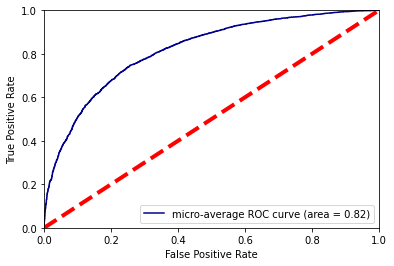

Epoch   1: Train Loss = 0.55380
Epoch   1: Train precision = 0.76859
Epoch   1: Train recall = 0.77785
Epoch   1: Train f1 score = 0.76935
Epoch   1: Train accuracy = 0.76941
Epoch   1: Valid Loss = 0.49663
Epoch   1: Valid precision = 0.80323
Epoch   1: Valid recall = 0.73123
Epoch   1: Valid f1_score = 0.76300
Epoch   1: Acurracy = 0.78217
The current loss: tensor(0.4966)
Epoch   2: Train Loss = 0.46378
Epoch   2: Train precision = 0.80553
Epoch   2: Train recall = 0.79210
Epoch   2: Train f1 score = 0.79593
Epoch   2: Train accuracy = 0.79868
Epoch   2: Valid Loss = 0.45066
Epoch   2: Valid precision = 0.81653
Epoch   2: Valid recall = 0.76121
Epoch   2: Valid f1_score = 0.78501
Epoch   2: Acurracy = 0.79990
The current loss: tensor(0.4507)
Epoch   3: Train Loss = 0.43331
Epoch   3: Train precision = 0.81676
Epoch   3: Train recall = 0.81017
Epoch   3: Train f1 score = 0.81081
Epoch   3: Train accuracy = 0.81259
Epoch   3: Valid Loss = 0.42999
Epoch   3: Valid precision = 0.79128
Ep

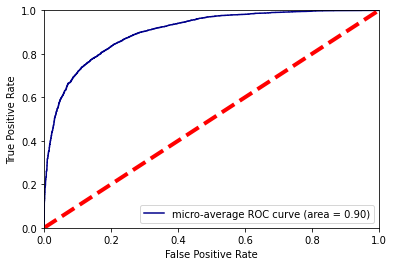

Epoch   6: Train Loss = 0.39881
Epoch   6: Train precision = 0.82833
Epoch   6: Train recall = 0.82693
Epoch   6: Train f1 score = 0.82512
Epoch   6: Train accuracy = 0.82599
Epoch   6: Valid Loss = 0.39830
Epoch   6: Valid precision = 0.83242
Epoch   6: Valid recall = 0.78690
Epoch   6: Valid f1_score = 0.80596
Epoch   6: Acurracy = 0.82030
The current loss: tensor(0.3983)
Epoch   7: Train Loss = 0.39356
Epoch   7: Train precision = 0.82825
Epoch   7: Train recall = 0.82607
Epoch   7: Train f1 score = 0.82500
Epoch   7: Train accuracy = 0.82718
Epoch   7: Valid Loss = 0.39445
Epoch   7: Valid precision = 0.80529
Epoch   7: Valid recall = 0.83602
Epoch   7: Valid f1_score = 0.81841
Epoch   7: Acurracy = 0.82279
The current loss: tensor(0.3945)
Epoch   8: Train Loss = 0.39035
Epoch   8: Train precision = 0.83080
Epoch   8: Train recall = 0.82976
Epoch   8: Train f1 score = 0.82777
Epoch   8: Train accuracy = 0.82941
Epoch   8: Valid Loss = 0.38989
Epoch   8: Valid precision = 0.81450
Ep

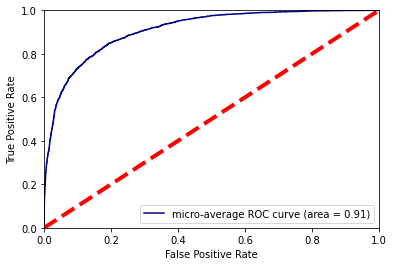

Epoch  11: Train Loss = 0.38094
Epoch  11: Train precision = 0.83289
Epoch  11: Train recall = 0.83551
Epoch  11: Train f1 score = 0.83166
Epoch  11: Train accuracy = 0.83252
Epoch  11: Valid Loss = 0.38277
Epoch  11: Valid precision = 0.82818
Epoch  11: Valid recall = 0.81358
Epoch  11: Valid f1_score = 0.81809
Epoch  11: Acurracy = 0.82628
The current loss: tensor(0.3828)
Epoch  12: Train Loss = 0.37933
Epoch  12: Train precision = 0.83218
Epoch  12: Train recall = 0.83324
Epoch  12: Train f1 score = 0.83039
Epoch  12: Train accuracy = 0.83155
Epoch  12: Valid Loss = 0.38197
Epoch  12: Valid precision = 0.81618
Epoch  12: Valid recall = 0.83423
Epoch  12: Valid f1_score = 0.82276
Epoch  12: Acurracy = 0.82661
The current loss: tensor(0.3820)
Epoch  13: Train Loss = 0.37870
Epoch  13: Train precision = 0.83424
Epoch  13: Train recall = 0.83413
Epoch  13: Train f1 score = 0.83147
Epoch  13: Train accuracy = 0.83223
Epoch  13: Valid Loss = 0.37978
Epoch  13: Valid precision = 0.82231
Ep

In [93]:
from sklearn.metrics import f1_score,recall_score,precision_score,classification_report,roc_curve,auc,accuracy_score
from sklearn.preprocessing import label_binarize

epochs = 15

list_loss_train = []
list_epochs = []
list_loss = []
list_f1_scores_train = []
list_f1_scores = []
list_recalls_train = []
list_recalls = []
list_precisions_train = []
list_precisions = []
the_last_loss = 50
patience = 2
trigger_times = 0
for epoch in range(epochs):
  model.train()
  batch_losses = []
  batch_f1_scores = []
  batch_recalls = []
  batch_precisions = []
  batch_accuracy = []
  for x_batch, y_batch in train_loader:
   x_batch = x_batch.view(len(x_batch),1,300)
   y_pred = model(x_batch)
   #y_batch.clone().detach().requires_grad_(True)
   loss = loss_func(y_pred.squeeze(), y_batch)
   batch_losses.append(loss.item())
   preds = torch.round(y_pred).squeeze()

   Preds = preds.tolist()
   Y_batch = y_batch.tolist()
   batch_f1_scores.append(f1_score(Y_batch, Preds))
   batch_recalls.append(recall_score(Y_batch, Preds))
   batch_precisions.append(precision_score(Y_batch, Preds))
   batch_accuracy.append(accuracy_score(Y_batch, Preds))
    #Delete previously stored gradients
   optimizer.zero_grad()

    #Perform backpropagation starting from the loss calculated in this epoch
   loss.backward()
   # Clip params
   nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.75)
    #Update model's weights based on the gradients calculated during backprop
   optimizer.step()
  print(f"Epoch {epoch:3}: Train Loss = {sum(batch_losses)/len(train_loader):.5f}")
  print(f"Epoch {epoch:3}: Train precision = {sum(batch_precisions)/len(train_loader):.5f}")
  print(f"Epoch {epoch:3}: Train recall = {sum(batch_recalls)/len(train_loader):.5f}")
  print(f"Epoch {epoch:3}: Train f1 score = {sum(batch_f1_scores)/len(train_loader):.5f}")
  print(f"Epoch {epoch:3}: Train accuracy = {sum(batch_accuracy)/len(train_loader):.5f}")
  list_loss_train.append(sum(batch_losses)/len(train_loader))
  list_f1_scores_train.append(sum(batch_f1_scores)/len(train_loader))
  list_precisions_train.append(sum(batch_precisions)/len(train_loader))
  list_recalls_train.append(sum(batch_recalls)/len(train_loader))
  with torch.no_grad():
    model.eval()
    Y_batches = []
    Y_preds = []
    F1 = []
    precision = []
    recall = []
    accuracy = []
    batch_losses_val = []
    for x,y in valid_loader:
      x = x.view(len(x),1,300)
      y_predict = model(x)
      #y.clone().detach()
      val_loss = loss_func(y_predict.squeeze(),y)
      batch_losses_val.append(val_loss)
      y_pr = torch.round(y_predict).squeeze()
    
      Y_p = y_pr.tolist()
      y_val = y.tolist()
      F1.append(f1_score(y_val, Y_p))

      precision.append(precision_score(y_val, Y_p))
      recall.append(recall_score(y_val, Y_p))
      accuracy.append(accuracy_score(y_val,Y_p))
      Y_batches.append(y)
      Y_preds.append(y_predict)
    
    Y_batches = torch.cat(Y_batches)
    Y_preds = torch.cat(Y_preds)
    print(f"Epoch {epoch:3}: Valid Loss = {sum(batch_losses_val)/len(valid_loader):.5f}")
    print(f"Epoch {epoch:3}: Valid precision = {sum(precision)/len(valid_loader):.5f}")
    print(f"Epoch {epoch:3}: Valid recall = {sum(recall)/len(valid_loader):.5f}")
    print(f"Epoch {epoch:3}: Valid f1_score = {sum(F1)/len(valid_loader):.5f}")
    print(f"Epoch {epoch:3}: Acurracy = {sum(accuracy)/len(valid_loader):.5f}")
    list_f1_scores.append(sum(F1)/len(valid_loader))
    list_loss.append(sum(batch_losses_val)/len(valid_loader))
    list_precisions.append(sum(precision)/len(valid_loader))
    list_recalls.append(sum(recall)/len(valid_loader))
    list_epochs.append(epoch)
    the_current_loss = sum(batch_losses_val)/len(valid_loader)
    print('The current loss:', the_current_loss)
    if the_current_loss > the_last_loss:
            trigger_times += 1
            print('trigger times:', trigger_times)

            if trigger_times >= patience:
                print('Early stopping!\nStart to test process.')
                break;

    the_last_loss = the_current_loss
  if epoch % 5 == 0:
       
       Y_label = label_binarize(Y_batches, classes=[0, 1])

       fpr, tpr, _ = roc_curve(Y_label.ravel(), Y_preds.ravel())
       roc_auc= auc(fpr, tpr)

       plt.figure()
       plt.plot(
          fpr,
          tpr,
          label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc),
          color="darkblue",
       )
       plt.plot([0, 1], [0, 1], color="red",lw=4, linestyle="--")
       plt.xlim([0.0, 1.0])
       plt.ylim([0.0, 1.0])
       plt.xlabel("False Positive Rate")
       plt.ylabel("True Positive Rate")
       plt.legend(loc="lower right")
       plt.show()

Text(0.5, 1.0, 'loss-score')

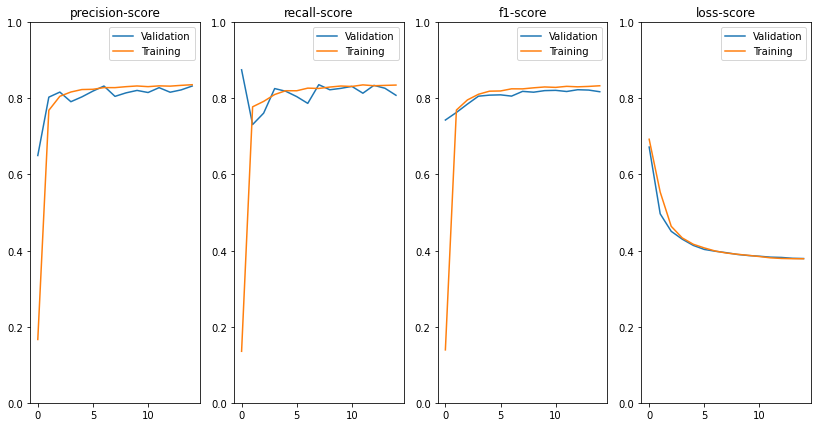

In [94]:
plt.subplots(1,4, figsize = (14,7))
plt.subplot(1,4,1)
plt.plot(list_epochs, list_precisions)
plt.plot(list_epochs, list_precisions_train)
plt.ylim(ymin = 0.0 ,ymax = 1.0)
plt.legend(["Validation", "Training"])
plt.title("precision-score")

plt.subplot(1,4,2)
plt.plot(list_epochs, list_recalls)
plt.plot(list_epochs, list_recalls_train)
plt.ylim(ymin = 0.0 ,ymax = 1.0)
plt.legend(["Validation", "Training"])
plt.title("recall-score")

plt.subplot(1,4,3)
plt.plot(list_epochs, list_f1_scores)
plt.plot(list_epochs, list_f1_scores_train)
plt.ylim(ymin = 0.0 ,ymax = 1.0)
plt.legend(["Validation", "Training"])
plt.title("f1-score")

plt.subplot(1,4,4)
plt.plot(list_epochs, list_loss)
plt.plot(list_epochs, list_loss_train)
plt.ylim(ymin = 0.0, ymax = 1.0)
plt.legend(["Validation", "Training"])
plt.title("loss-score")

<ipython-input-87-bac5eb1aa4a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['review']= test_data['review'].apply(lambda x:basic_preprocessing(x))
<ipython-input-87-bac5eb1aa4a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['review']= test_data['review'].apply(lambda x:remove_duplicates(x))
<ipython-input-87-bac5eb1aa4a3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

Epoch  14: Valid Loss = 0.36733
Epoch  14: Valid precision = 0.83524
Epoch  14: Valid recall = 0.84512
Epoch  14: Valid f1_score = 0.83781
Epoch  14: Acurracy = 0.83879


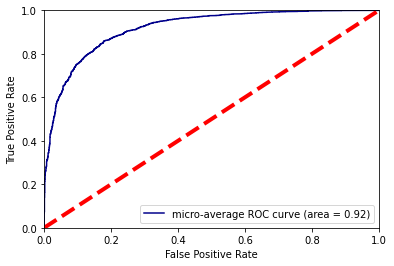

In [87]:
test_data = dataset[0:4000]
if test_data is not None:
  test_data['review']= test_data['review'].apply(lambda x:basic_preprocessing(x))
  test_data['review']= test_data['review'].apply(lambda x:remove_duplicates(x))
  test_data['review']= test_data['review'].apply(lambda x:remove_stopwords(x))

  Y3 = test_data[['rating']]

  Y3.loc[Y3['rating'] <= 4.0, 'rating'] = 0.0
  Y3.loc[Y3['rating'] >= 7.0, 'rating'] = 1.0
  
  documents_test = []
  for i in range(len(test_data)):
   documents_test.append(test_data['review'][i])

  X_test = []
  Y_test = []
  for i in range(len(documents_test)):
    X3 = np.zeros(300)
    count_words = 0
    for word in range(len(documents_test[i])):
      try:
        X3 = X3 + np.array(vocabulary[documents_test[i][word]])
        count_words += 1
      except:
        continue
    if count_words != 0:
       X3 = X3/count_words
    X_test.append(X3)
    Y_test.append(Y3['rating'][i])

  X_test = torch.tensor(np.asarray(X_test), dtype=torch.float, device=device)
  Y_test = torch.tensor(np.asarray(Y_test), dtype=torch.float, device=device) 
  test_dataset = TensorDataset(X_test, Y_test)
  test_loader = DataLoader(test_dataset, batch_size=64, shuffle = True)
  Y_batches = []
  Y_preds = []
  F1_score = []
  precisions = []
  recalls = []
  Accuracy = []
  Batch_losses_val = []

  with torch.no_grad():
    model.eval()
    for X,Y in test_loader:
      Y_predict = model(X.view(len(X),1,300))
      val_loss = loss_func(Y_predict.squeeze(),Y)
      Batch_losses_val.append(val_loss)
      Y_pr = torch.round(Y_predict).squeeze()
      
      Y_preds.append(Y_predict)
      Y_p = Y_pr.tolist()
      y_val = Y.tolist()
      
      F1_score.append(f1_score(y_val, Y_p))

      precisions.append(precision_score(y_val, Y_p))
      recalls.append(recall_score(y_val, Y_p))
      Accuracy.append(accuracy_score(y_val,Y_p))
      Y_batches.append(Y)

    Y_batches = torch.cat(Y_batches)
    Y_preds = torch.cat(Y_preds)
    
    print(f"Epoch {epoch:3}: Valid Loss = {sum(Batch_losses_val)/len(test_loader):.5f}")
    print(f"Epoch {epoch:3}: Valid precision = {sum(precisions)/len(test_loader):.5f}")
    print(f"Epoch {epoch:3}: Valid recall = {sum(recalls)/len(test_loader):.5f}")
    print(f"Epoch {epoch:3}: Valid f1_score = {sum(F1_score)/len(test_loader):.5f}")
    print(f"Epoch {epoch:3}: Acurracy = {sum(Accuracy)/len(test_loader):.5f}")
       
  Y_label = label_binarize(Y_batches, classes=[0, 1])

  fpr, tpr, _ = roc_curve(Y_label.ravel(), Y_preds.ravel())
  roc_auc= auc(fpr, tpr)

  plt.figure()
  plt.plot(
     fpr,
     tpr,
     label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc),
     color="darkblue",
     )
  
  plt.plot([0, 1], [0, 1], color="red",lw=4, linestyle="--")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.legend(loc="lower right")
  plt.show()

In [88]:
#Saving the model of no skip connections
torch.save(model.state_dict(), ('RNN.pt'))
model.load_state_dict(torch.load('RNN.pt'))
model.eval()

RNN(
  (Dropout): Dropout(p=0.05, inplace=False)
  (rnn): GRU(300, 8, num_layers=5, batch_first=True, bidirectional=True)
  (out): Linear(in_features=16, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)